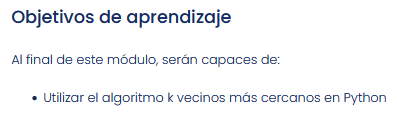

Bibliotecas a utilizar

In [ ]:
import pandas as pd
import numpy as np
# For scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Ordenar los datos en matriz de caracteristicas y vector objetivo.

In [ ]:
X = df.drop(columns="target")
y =df["target"]
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

- Instanciar el escalador estandar

La estandarizacion de un conjunto de datos es un requisito comun para diversos estimadores de aprendizaje automatico (estimador es otro nombre para modelo en scikit-learn)

In [ ]:
scaler = StandardScaler()

**K vecinos mas cercanos**

1. Hacer instancia del modelo

Aqui es donde podemos ajustar los hiperparametros del modelo. En este caso, n_neighbors=1. Querran intentar diferentes valores para los numeros de vecinos. El valor por defecto es 5.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)
predictions = knn_pipe.predict(X_test)
predictions

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

2. Poner scaler y el modelo en un pipeline y ajustar el pipeline en los datos de entrenamiento.

In [ ]:
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

3. Predecir los valores para el conjunto de prueba

In [ ]:
predictions = knn_pipe.predict(X_test)
predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0])

4. Evaluar el rendimiento del modelo en el conjunto de prueba.

In [ ]:
acc_score = knn_pipe.score(X_test, y_test)
acc_score-

1.0

#**Si KNN puede llegar a una exactitud del 100%, por que no se usa mas a menudo?**

KNN es un modelo basado en instancias ( aprendizaje perezoso) que almacena todos los datos ( muy intensivos en memoria) con los que se ajusto.

No existe una fase de entrenamiento explicita antes de la clasificacion. Es decir, .fit no hace mucho para este modelo con respecto a otros modelos como la regresion linear, los arboles de decision, las redes neuronales, etc.

Mantener un conjunto de datos completo en la memoria y realizar las clasificaciones o regresiones puede ser computacionalmente muy costoso, ya que el algoritmo tiene que analizar todos los puntos de datos. Por esta razon, KNN tiende a funcionar mejor en pequenos conjuntos de datos que no tienen muchas caracteristicas.